In [37]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import os
import pandas as pd
import shutil
import matplotlib.image as mpimg
from tqdm import tqdm
from PIL import Image
import numpy as np

### Create a DataFrame that is Emotive vs. Neutral for Binary Classification Task

In [38]:
import constants

labels = pd.read_csv(constants.LABELS_PATH_CROPPED)
labels.head()

,path,label,width,height,label_encoded
0,cropped_emotions.100096~12fffff.png,Surprise,224,272,3
1,cropped_emotions.260779~12fffff.png,Surprise,215,357,3
2,cropped_emotions.263616~12fffff.png,Surprise,381,493,3
3,cropped_emotions.263141~12fffff.png,Surprise,74,135,3
4,cropped_emotions.100252~12fffff.png,Surprise,159,194,3


In [39]:
emotive = labels[labels['label']!= "Neutral"]

# Rename non-neutral as 'Emotive' to encompass all emotions
emotive.loc[:, 'label'] = 'Emotive'

# Create Neutral dataframe
neutral = labels[labels['label'] == "Neutral"]
neutral.loc[:, 'label'] = 'Neutral'

# print lengths 
print(f"{len(emotive) = }")
print(f"{len(neutral) = }")

len(emotive) = 4183
len(neutral) = 1154


In [40]:
# Combine both dataframes

df_binary = pd.concat([emotive, neutral])
print(df_binary.head())
print(df_binary.tail())

                                  path    label  width  height  label_encoded
0  cropped_emotions.100096~12fffff.png  Emotive    224     272              3
1  cropped_emotions.260779~12fffff.png  Emotive    215     357              3
2  cropped_emotions.263616~12fffff.png  Emotive    381     493              3
3  cropped_emotions.263141~12fffff.png  Emotive     74     135              3
4  cropped_emotions.100252~12fffff.png  Emotive    159     194              3
                              path    label  width  height  label_encoded
4462  cropped_emotions.277957f.png  Neutral    187     282              4
4463  cropped_emotions.171737f.png  Neutral    206     274              4
4464  cropped_emotions.277838f.png  Neutral    268     405              4
4465  cropped_emotions.171829f.png  Neutral     88     169              4
4466  cropped_emotions.171729f.png  Neutral    166     212              4


#### Re-encode the labels

In [41]:
LABEL_ENCODE_DICT = {
    'Emotive': 1,
    'Neutral': 0
}

In [42]:
def encode_label(df, encoder_dict):
    """returns df where label column is encoded"""
    df['label_encoded'] = df['label'].map(encoder_dict)
    return df

encode_label(df_binary, LABEL_ENCODE_DICT)

,path,label,width,height,label_encoded
0,cropped_emotions.100096~12fffff.png,Emotive,224,272,1
1,cropped_emotions.260779~12fffff.png,Emotive,215,357,1
2,cropped_emotions.263616~12fffff.png,Emotive,381,493,1
3,cropped_emotions.263141~12fffff.png,Emotive,74,135,1
4,cropped_emotions.100252~12fffff.png,Emotive,159,194,1
...,...,...,...,...,...
4462,cropped_emotions.277957f.png,Neutral,187,282,0
4463,cropped_emotions.171737f.png,Neutral,206,274,0
4464,cropped_emotions.277838f.png,Neutral,268,405,0
4465,cropped_emotions.171829f.png,Neutral,88,169,0


### Data Preprocessing

In [43]:
import preprocessing

Split dataframe into array for images and array for labels

In [44]:
X, y = preprocessing.preprocess_data_part1(df_binary, constants.IMAGES_FOLDER_PATH)
X_grey, y_grey = preprocessing.preprocess_data_part1(df_binary, constants.IMAGES_FOLDER_PATH, greyscale=True)

print(f"images shape {X.shape}")
print(f"y shape {y.shape}")
print(f"grey images shape {X_grey.shape}")
print(f"grey y shape {y_grey.shape}")

images shape (5337, 160, 120, 3)
y shape (5337,)
grey images shape (5337, 160, 120, 1)
grey y shape (5337,)


Print 5 Random Examples with their Labels

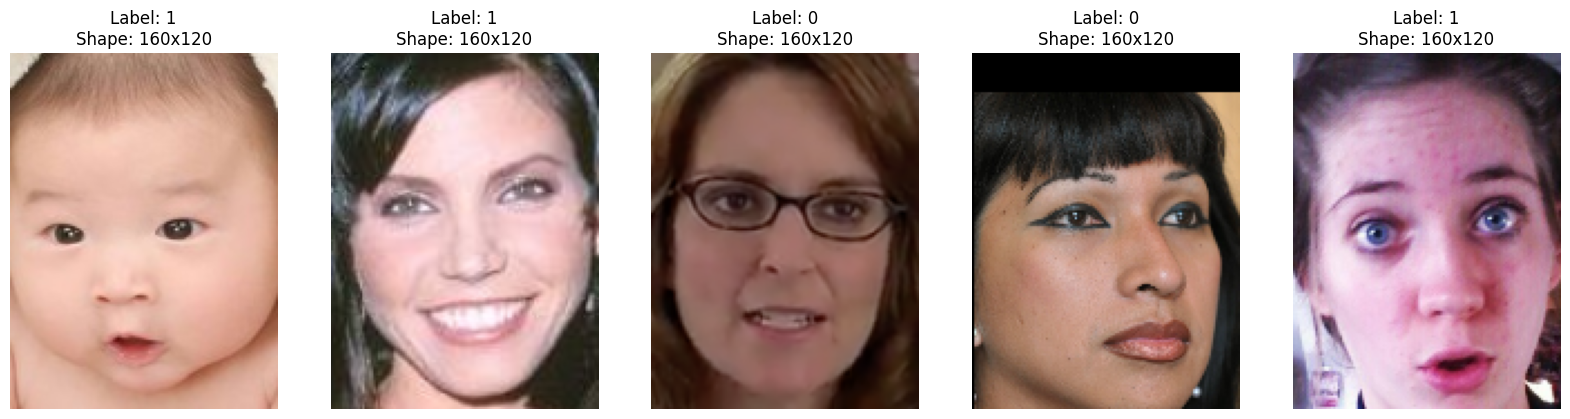

In [45]:
# Choose 5 random indices
random_indices = np.random.choice(X.shape[0], size=5, replace=False)

# Create a figure and axes
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
# Iterate over the random indices and display the images
for i, idx in enumerate(random_indices):
    # Display the image
    axes[i].imshow(X[idx] / 255.0)  # Scale pixel values to [0, 1] for display
    axes[i].set_title(f"Label: {y[idx]}\nShape: {X[idx].shape[0]}x{X[idx].shape[1]}")
    axes[i].axis('off')

plt.show()

Reprint in greyscale

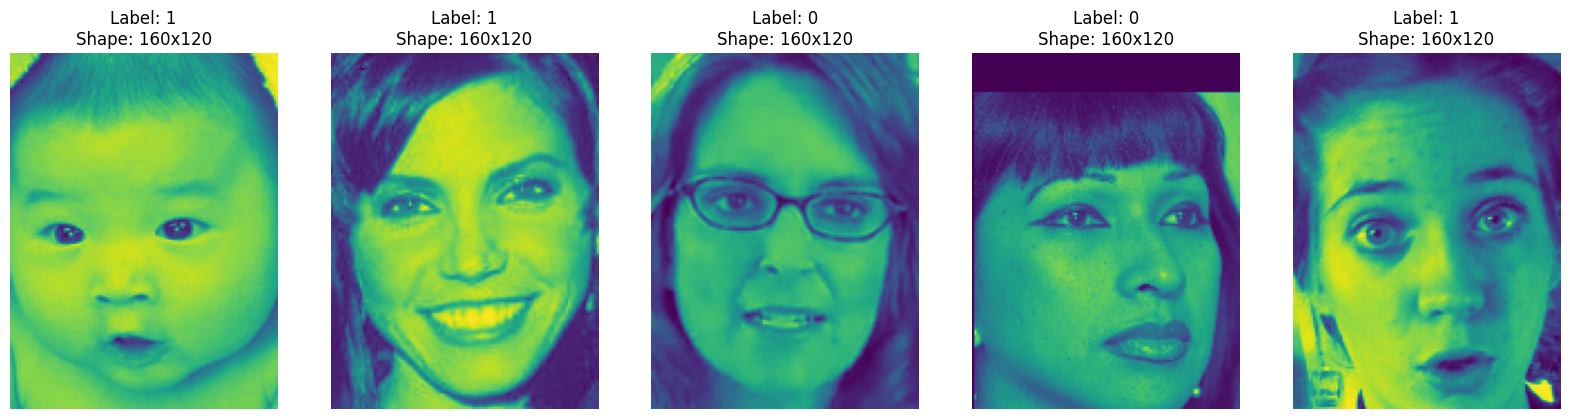

In [46]:
# Create a figure and axes
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
# Iterate over the random indices and display the images
for i, idx in enumerate(random_indices):
    # Display the image
    axes[i].imshow(X_grey[idx] / 255.0)  # Scale pixel values to [0, 1] for display
    axes[i].set_title(f"Label: {y_grey[idx]}\nShape: {X_grey[idx].shape[0]}x{X_grey[idx].shape[1]}")
    axes[i].axis('off')

plt.show()

#### Shuffle, split, and augment the data

In [47]:
# define splits
split = (0.6, 0.2, 0.2)
X_train, y_train, X_val, y_val, X_test, y_test = preprocessing.data_split_and_augment(X, y, split)

X_train_grey, y_train_grey, X_val_grey, y_val_grey, X_test_grey, y_test_grey = preprocessing.data_split_and_augment(X_grey, y_grey, split)


print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")
print(f"X_train_grey shape {X_train_grey.shape}")
print(f"X_val_grey shape {X_val_grey.shape}")
print(f"X_test_grey shape {X_test_grey.shape}")

X_train shape (6404, 160, 120, 3)
y_train shape (6404,)
X_val shape (1067, 160, 120, 3)
y_val shape (1067,)
X_test shape (1068, 160, 120, 3)
y_test shape (1068,)
X_train_grey shape (6404, 160, 120, 1)
X_val_grey shape (1067, 160, 120, 1)
X_test_grey shape (1068, 160, 120, 1)


In [48]:
# delete the X and Y arrays to free up more space in RAM
del X
del y

#### Exploratory Data Analysis on Training Set Balance

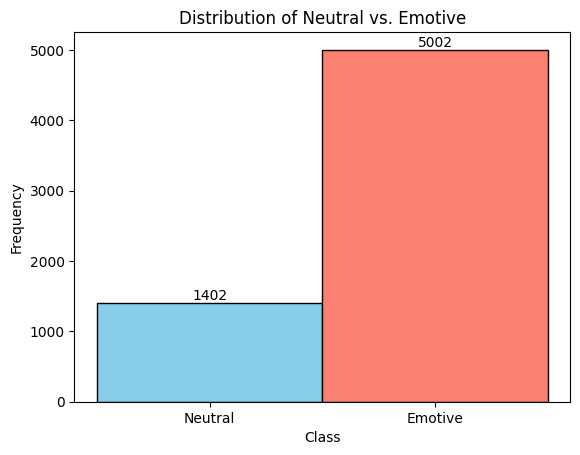

In [49]:
n, bins, patches = plt.hist(y_train, bins=2, edgecolor='black', align='mid')

# Set colors for the bars
colors = ['skyblue', 'salmon']
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i])

# Set labels for the x-axis and y-axis
plt.xlabel('Class')
plt.ylabel('Frequency')

# Set ticks to show labels for classes
plt.xticks([.25, .75], ['Neutral', 'Emotive'])

# Set the title of the plot
plt.title('Distribution of Neutral vs. Emotive')

# Add labels in the middle of the bars
for patch in patches:
    height = patch.get_height()
    # Calculate the x position of the label (middle of the bar)
    x = patch.get_x() + patch.get_width() / 2
    # Add the label with the height value
    plt.text(x, height, str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

##### Rebalancing the Data

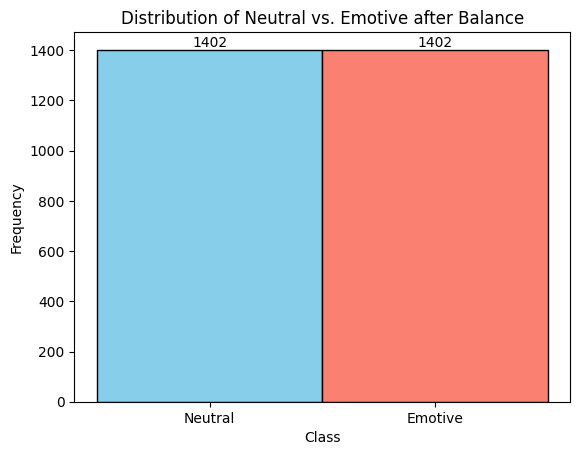

(2804, 160, 120, 3)
(2804,)


In [50]:
# Count the number of 'Neutral' instances
neutral_count = np.sum(y_train == 0)

# Find indices of 'Emotive' instances
emotive_indices = np.where(y_train == 1)[0]

# Randomly select 'Emotive' indices to remove to match the 'Neutral' count
indices_to_remove = np.random.choice(emotive_indices, size=len(emotive_indices) - neutral_count, replace=False)

# Remove the selected 'Emotive' instances from X_train and y_train
X_train_balanced = np.delete(X_train, indices_to_remove, axis=0)
y_train_balanced = np.delete(y_train, indices_to_remove, axis=0)

X_train_balanced_grey = np.delete(X_train_grey, indices_to_remove, axis=0)
y_train_balanced_grey = np.delete(y_train_grey, indices_to_remove, axis=0)


n, bins, patches = plt.hist(y_train_balanced, bins=2, edgecolor='black', align='mid')

# Set colors for the bars
colors = ['skyblue', 'salmon']
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i])

# Set labels for the x-axis and y-axis
plt.xlabel('Class')
plt.ylabel('Frequency')

# Set ticks to show labels for classes
plt.xticks([.25, .75], ['Neutral', 'Emotive'])

# Set the title of the plot
plt.title('Distribution of Neutral vs. Emotive after Balance')

# Add labels in the middle of the bars
for patch in patches:
    height = patch.get_height()
    # Calculate the x position of the label (middle of the bar)
    x = patch.get_x() + patch.get_width() / 2
    # Add the label with the height value
    plt.text(x, height, str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

print(X_train_balanced.shape)
print(y_train_balanced.shape)

### Baseline Model

Our baseline model will always predict the majority class. We calculate training accuracy on the balanced dataset, which would always have 50% accuracy.

In [52]:
from sklearn.metrics import accuracy_score


class MajorityClassModel:
    """ A dummy model that always predicts the majority class """
    def __init__(self, majority_class):
        self.majority_class = majority_class

    def predict(self, X):
        return np.array([self.majority_class] * len(X))

    def evaluate(self, X, y_true):
        y_pred = self.predict(X)
        accuracy = round(accuracy_score(y_true, y_pred), 4)
        return accuracy

In [53]:
# Find the most frequent value in y_train (
class_frequencies = np.unique(y_train, return_counts=True)
majority_class = class_frequencies[0][np.argmax(class_frequencies[1])]
print(f"{majority_class = }")

# Initialize the model
base_model = MajorityClassModel(majority_class)

# # "Train" the model (no actual training needed for this dummy model)

# Make predictions on validation and test sets
y_val_pred = base_model.predict(X_val)  # Replace val_df with actual image data if available
y_test_pred = base_model.predict(X_test)  # Replace test_df with actual image data if available


# Evaluate the model, rounded to 3 decimals
val_accuracy = base_model.evaluate(X_val, y_val)
test_accuracy = base_model.evaluate(X_test, y_test)

print(f"Validation Accuracy: {val_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

majority_class = 1
Validation Accuracy: 0.7826
Test Accuracy: 0.7931


In [67]:
df_model_accuracy = pd.DataFrame({
    'Model': ['Baseline'],
    'Training Accuracy': [base_model.evaluate(X_train_balanced, y_train_balanced)],
    'Validation Accuracy': [val_accuracy],
    'Test Accuracy': [test_accuracy],
    'Color?': ['Yes']
})
df_model_accuracy

,Model,Training Accuracy,Validation Accuracy,Test Accuracy,Color?
0,Baseline,0.5,0.7826,0.7931,Yes


In [68]:
grey_row = {
    'Model': 'Baseline',
    'Training Accuracy': base_model.evaluate(X_train_balanced_grey, y_train_balanced_grey),
    'Validation Accuracy': val_accuracy,
    'Test Accuracy': test_accuracy,
    'Color?': 'No'
}

# Using append (deprecated)
# df = df.append(new_row, ignore_index=True)

# Using concat (recommended)
df_model_accuracy = pd.concat([df_model_accuracy, pd.DataFrame([grey_row])], ignore_index=True)
df_model_accuracy

,Model,Training Accuracy,Validation Accuracy,Test Accuracy,Color?
0,Baseline,0.5,0.7826,0.7931,Yes
1,Baseline,0.5,0.7826,0.7931,No


# Build our Basic Binary Model With the Balanced Training Set


In [20]:
# define an instance of the early_stopping class
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor='accuracy',
verbose=1,
patience=4,
mode='max',
restore_best_weights=True)

In [56]:
class BasicCNNModel:
    def __init__(self, input_shape, learning_rate=0.001):
        self.model = self.create_cnn_model()
        self.model.build(input_shape=input_shape)
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                           loss=tf.keras.losses.BinaryCrossentropy(),
                           metrics=['accuracy'])

    def create_cnn_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv2D(filters=12, kernel_size=(4, 4), strides=(1, 1), padding='same',
                                         data_format='channels_last', name='conv_1', activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(tf.keras.layers.Dropout(0.3))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        return model

    def summary(self):
        self.model.summary()

    def fit(self, X_train, y_train, epochs, validation_data, callbacks):
        self.model.fit(X_train, y_train, epochs=epochs, validation_data=validation_data, callbacks=callbacks)

    def evaluate(self, X, y):
        return self.model.evaluate(X, y)

    def predict(self, X):
        return self.model.predict(X)

# Example usage
# Assuming X_train_balanced, y_train_balanced, X_val, y_val are already defined
input_shape = (None, 160, 120, 3)

cnn_model_color = BasicCNNModel(input_shape=input_shape, learning_rate = .0001)
cnn_model_color.summary()
cnn_model_color.fit(X_train_balanced, y_train_balanced, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
train_acc_cnn_color = cnn_model_color.evaluate(X_train_balanced, y_train_balanced)
val_acc_cnn_color = cnn_model_color.evaluate(X_val, y_val)

print("Training Accuracy:", train_acc_cnn_color[1])
print("Validation Accuracy:", val_acc_cnn_color[1])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 160, 120, 12)   │           588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 80, 60, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 80, 60, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │        57,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,189 (227.30 KB)

 Trainable params: 58,189 (227.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - accuracy: 0.4974 - loss: 0.7000 - val_accuracy: 0.7863 - val_loss: 0.5770
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6157 - loss: 0.6579 - val_accuracy: 0.7835 - val_loss: 0.5519
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6649 - loss: 0.6267 - val_accuracy: 0.7601 - val_loss: 0.5427
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6765 - loss: 0.6064 - val_accuracy: 0.7376 - val_loss: 0.5573
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5621 - loss: 0.6622
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7845 - loss: 0.5745 
Training Accuracy: 0.5413694977760315
Validation Accuracy: 0.7863167524337769


#### Same Model on the Greyscale Data

In [57]:
input_shape_grey = (None, 160, 120, 1)

cnn_model_grey = BasicCNNModel(input_shape=input_shape_grey, learning_rate = .0001)
cnn_model_grey.summary()
cnn_model_grey.fit(X_train_balanced_grey, y_train_balanced_grey, epochs=10, validation_data=(X_val_grey, y_val_grey), callbacks=[early_stopping])

# Evaluate the model
train_acc_cnn_grey = cnn_model_grey.evaluate(X_train_balanced_grey, y_train_balanced_grey)
val_acc_cnn_grey = cnn_model_grey.evaluate(X_val_grey, y_val_grey)

print("Training Accuracy Greyscale:", train_acc_cnn_grey[1])
print("Validation Accuracy Greyscale:", val_acc_cnn_grey[1])

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 160, 120, 12)   │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 80, 60, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 80, 60, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │        57,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,805 (225.80 KB)

 Trainable params: 57,805 (225.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.4963 - loss: 0.7058 - val_accuracy: 0.7788 - val_loss: 0.5799
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5794 - loss: 0.6733 - val_accuracy: 0.7554 - val_loss: 0.5737
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6045 - loss: 0.6537 - val_accuracy: 0.7188 - val_loss: 0.5954
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6317 - loss: 0.6397 - val_accuracy: 0.7245 - val_loss: 0.5802
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5610 - loss: 0.6698
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7831 - loss: 0.5827
Training Accuracy Greyscale: 0.5431526303291321
Validation Accuracy Greyscale: 0.7788191437721252


In [69]:
test_acc_cnn_color = cnn_model_color.evaluate(X_test, y_test)
test_acc_cnn_grey = cnn_model_grey.evaluate(X_test_grey, y_test_grey)

new_row = {'Model': 'Basic CNN', 'Training Accuracy':  train_acc_cnn_color[1], 'Validation Accuracy': val_acc_cnn_color[1],
    'Test Accuracy': test_acc_cnn_color[1], 'Color?': 'Yes'}

second_row = {'Model': 'Basic CNN', 'Training Accuracy':  train_acc_cnn_grey[1], 'Validation Accuracy': val_acc_cnn_grey[1],
    'Test Accuracy': test_acc_cnn_grey[1], 'Color?': 'No'}

df_model_accuracy = pd.concat([df_model_accuracy, pd.DataFrame([new_row, second_row])], ignore_index=True)
df_model_accuracy

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7510 - loss: 0.5866
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7638 - loss: 0.5915


,Model,Training Accuracy,Validation Accuracy,Test Accuracy,Color?
0,Baseline,0.500000,0.782600,0.793100,Yes
1,Baseline,0.500000,0.782600,0.793100,No
2,Basic CNN,0.541369,0.786317,0.769663,Yes
3,Basic CNN,0.543153,0.778819,0.764981,No


#### Visualize Predictions of the Basic CNN vs. the actual images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


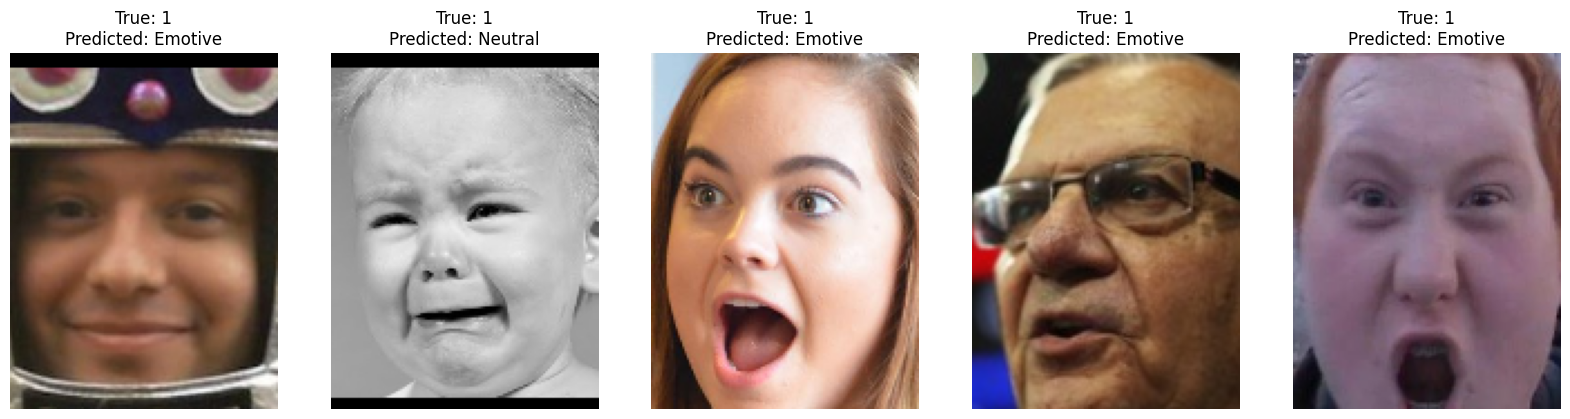

In [59]:
# Choose 5 random indices from indices_to_remove
random_indices = np.random.choice(indices_to_remove, size=5, replace=False)

# Create a figure and axes
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Iterate over the random indices and display the images with predictions
for i, idx in enumerate(random_indices):
    image = X_train[idx]
    # original_label = df_binary.loc[idx, 'original_label']
    true_label = y_train[idx]

    # Make a prediction for the image
    prediction = cnn_model_color.predict(np.expand_dims(image, axis=0))
    predicted_label = "Emotive" if prediction > 0.5 else "Neutral"

    # Display the image
    axes[i].imshow(image)
    axes[i].set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    axes[i].axis('off')

plt.show()

## Create Complex CNN (Hima's Model)

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

class ComplexCNNModel:
    def __init__(self, input_shape, learning_rate=0.001):
        self.input_shape = input_shape
        self.learning_rate = learning_rate
        self.model = self.create_complex_cnn_model()

    def create_complex_cnn_model(self):
        model = Sequential()
        # 1st Convolutional layer
        model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=self.input_shape))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        # 2nd Convolutional layer
        model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        # 3rd Convolutional layer
        model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        # Flattening layer
        model.add(Flatten())
        # 1st Dense layer
        model.add(Dense(units=512, activation='relu'))
        model.add(Dropout(0.5))
        # 2nd Dense layer
        model.add(Dense(units=256, activation='relu'))
        model.add(Dropout(0.5))
        # Output layer
        model.add(Dense(units=1, activation='sigmoid'))  # For binary classification
        # Compile the model
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

    def summary(self):
        self.model.summary()

    def fit(self, X_train, y_train, epochs, batch_size, validation_data, callbacks):
        self.history = self.model.fit(X_train, y_train,
                                      epochs=epochs,
                                      batch_size=batch_size,
                                      validation_data=validation_data,
                                      callbacks=callbacks)

    def evaluate(self, X, y):
        return self.model.evaluate(X, y)

    def predict(self, X):
        return self.model.predict(X)

# Example usage
# Assuming X_train, y_train, X_val, y_val are already defined and preprocessed
input_shape = (160, 120, 3)  # Update this to match your input data shape

cnn_model2 = ComplexCNNModel(input_shape=input_shape)
cnn_model2.summary()

cnn_model2.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
train_accuracy_complex = cnn_model2.evaluate(X_train_balanced, y_train_balanced)
val_accuracy_complex = cnn_model2.evaluate(X_val, y_val)

print("Training accuracy:", train_accuracy_complex[1])
print("Validation accuracy:", val_accuracy_complex[1])

# # Predict on new data
# y_pred = cnn_model.predict(X_val)
# print("Predictions:", y_pred)

/Users/mayaleviten/src/207_final_project/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 158, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 79, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 79, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 77, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 38, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 38, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 36, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 18, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 18, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 29952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │    15,335,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,560,769 (59.36 MB)

 Trainable params: 15,560,769 (59.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 31s 264ms/step - accuracy: 0.5055 - loss: 0.8426 - val_accuracy: 0.7826 - val_loss: 0.6591
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 253ms/step - accuracy: 0.5197 - loss: 0.6938 - val_accuracy: 0.7826 - val_loss: 0.6924
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 23s 256ms/step - accuracy: 0.4837 - loss: 0.6935 - val_accuracy: 0.2174 - val_loss: 0.6941
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.5127 - loss: 0.6927 - val_accuracy: 0.7826 - val_loss: 0.6901
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5219 - loss: 0.6924
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7823 - loss: 0.6594
Training accuracy: 0.5
Validation accuracy: 0.7825679183006287


In [71]:
test_acc_cnn2 = cnn_model2.evaluate(X_test, y_test)[1]

new_row2 = {'Model': 'Complex CNN', 'Training Accuracy': train_accuracy_complex[1], 'Validation Accuracy':val_accuracy_complex[1],
    'Test Accuracy': test_acc_cnn2, 'Color?': 'Yes'}

df_model_accuracy = pd.concat([df_model_accuracy, pd.DataFrame([new_row2])], ignore_index=True)
df_model_accuracy

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7776 - loss: 0.6603


,Model,Training Accuracy,Validation Accuracy,Test Accuracy,Color?
0,Baseline,0.500000,0.782600,0.793100,Yes
1,Baseline,0.500000,0.782600,0.793100,No
2,Basic CNN,0.541369,0.786317,0.769663,Yes
3,Basic CNN,0.543153,0.778819,0.764981,No
4,Complex CNN,0.500000,0.782568,0.793071,Yes


Complex CNN on Greyscale Data

In [73]:
input_shape = (160, 120, 1)  # Update this to match your input data shape

cnn_model2_grey = ComplexCNNModel(input_shape=input_shape)
cnn_model2_grey.summary()

cnn_model2_grey.fit(X_train_balanced_grey, y_train_balanced_grey, epochs=10, batch_size=32, validation_data=(X_val_grey, y_val_grey), callbacks=[early_stopping])

# Evaluate the model
train_accuracy_complex_grey = cnn_model2_grey.evaluate(X_train_balanced_grey, y_train_balanced_grey)
val_accuracy_complex_grey = cnn_model2_grey.evaluate(X_val_grey, y_val_grey)

print("Training accuracy:", train_accuracy_complex_grey[1])
print("Validation accuracy:", val_accuracy_complex_grey[1])

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 158, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 79, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 79, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 77, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 38, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 38, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 36, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 18, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 18, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 29952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │    15,335,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,560,193 (59.36 MB)

 Trainable params: 15,560,193 (59.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - accuracy: 0.4941 - loss: 0.7841 - val_accuracy: 0.7826 - val_loss: 0.6887
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 251ms/step - accuracy: 0.5089 - loss: 0.6936 - val_accuracy: 0.2174 - val_loss: 0.6955
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - accuracy: 0.5031 - loss: 0.6930 - val_accuracy: 0.6354 - val_loss: 0.6927
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.5132 - loss: 0.6930 - val_accuracy: 0.6045 - val_loss: 0.6980
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5219 - loss: 0.6928
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7823 - loss: 0.6888
Training accuracy: 0.5
Validation accuracy: 0.7825679183006287


In [75]:
test_acc_cnn2_grey = cnn_model2_grey.evaluate(X_test_grey, y_test_grey)[1]

new_row2_grey = {'Model': 'Complex CNN', 'Training Accuracy': train_accuracy_complex_grey[1], 'Validation Accuracy':val_accuracy_complex_grey[1],
    'Test Accuracy': test_acc_cnn2_grey, 'Color?': 'No'}

df_model_accuracy = pd.concat([df_model_accuracy, pd.DataFrame([new_row2_grey])], ignore_index=True)
df_model_accuracy

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7776 - loss: 0.6888


,Model,Training Accuracy,Validation Accuracy,Test Accuracy,Color?
0,Baseline,0.5,0.7826,0.793100,Yes
1,Baseline,0.5,0.7826,0.793100,No
2,Basic CNN,0.541369,0.786317,0.769663,Yes
3,Basic CNN,0.543153,0.778819,0.764981,No
4,Complex CNN,0.5,0.782568,0.793071,Yes
5,Complex CNN,"[0.6931737661361694, 0.5]","[0.6887433528900146, 0.7825679183006287]",0.793071,No
6,Complex CNN,0.5,0.782568,0.793071,No


#### Confusion Matrices

##### Confusion Matrix for Basic CNN

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


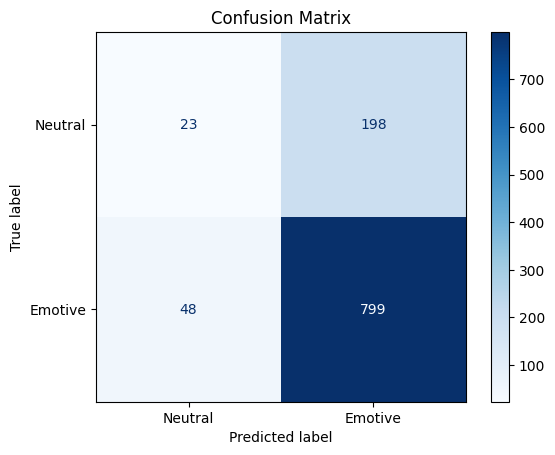

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = cnn_model_color.predict(X_test)
# Convert predictions to binary labels (0 or 1) based on a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Neutral', 'Emotive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()